# Laboratorio 1. 
# Análisis Exploratorio, PCA y Apriori

Diana Lucía Fernández Villatoro - 21747
Jennifer Michelle Toxcón Ordoñez - 21276

### Importación de librerias

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from apyori import apriori

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

### Paso 2
### Cargar los datos

In [3]:
df = pd.read_csv("risk_factors_cervical_cancer.csv", sep = ",")

In [4]:
type(df)

pandas.core.frame.DataFrame

###  Vemos la estructura de la data

In [5]:
n = int(input("Ingrese las filas que desea ver"))
df.head(n)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


In [6]:
df.tail(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
848,31,3.0,18.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,...,?,?,0,0,0,0,0,0,0,0
849,32,3.0,18.0,1.0,1.0,11.0,0.16,1.0,6.0,0.0,...,?,?,1,0,1,0,0,0,0,0
850,19,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
851,23,2.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
852,43,3.0,17.0,3.0,0.0,0.0,0.0,1.0,5.0,0.0,...,?,?,0,0,0,0,0,0,0,0
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0
857,29,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,...,?,?,0,0,0,0,0,0,0,0


## Vemos como está compuesto

In [7]:
df.shape

(858, 36)

## Vemos estadística descriptiva

In [8]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [ ]:
df.Biopsy.describe()

count    858.000000
mean       0.064103
std        0.245078
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Biopsy, dtype: float64

## Sacamos valores únicos

In [ ]:
df.Biopsy.unique()

array([0, 1], dtype=int64)

In [ ]:
df.Smokes.unique()

array(['0.0', '1.0', '?'], dtype=object)

## Ver valores duplicados

In [ ]:
df.duplicated().sum()

23

## Ver nulos

In [ ]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


## Cambiar nombres a columnas

In [32]:
df.rename(columns = {"Dx:HPV" : "DxHPV"} , inplace = True
         )

In [33]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokesyears,Smokespacksyear,Hormonal Contraceptives,HormonalContraceptivesyears,IUD,...,STDsTimesincefirstdiagnosis,STDsTimesincelastdiagnosis,DxCancer,DxCIN,DxHPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [34]:
print(df.columns)


Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokesyears', 'Smokespacksyear',
       'Hormonal Contraceptives', 'HormonalContraceptivesyears', 'IUD',
       'IUDyear', 'STDs', 'STDsnumber', 'STDscondylomatosis',
       'STDscervicalcondylomatosis', 'STDsvaginalcondylomatosis',
       'STDsvulvoperinealcondylomatosis', 'STDsyphilis',
       'STDspelvicinflammatorydisease', 'STDsgenitalherpes',
       'STDsmolluscumcontagiosum', 'STDsAIDS', 'STDsHIV', 'STDsHepatitisB',
       'STDsHPV', 'STDsNumberofdiagnosis', 'STDsTimesincefirstdiagnosis',
       'STDsTimesincelastdiagnosis', 'DxCancer', 'DxCIN', 'DxHPV', 'Dx',
       'Hinselmann', 'Schiller', 'Citology', 'Biopsy'],
      dtype='object')


### Ver frecuencias

In [35]:
df.DxCancer.value_counts()

0    840
1     18
Name: DxCancer, dtype: int64

## Identificación del Tipo de Variables


### Variables cuantitativas continuas: 
Age, Number.of.sexual.partners, First.sexual.intercourse, Num.of.pregnancies, Smokes.years, Smokes.packs.per.year, Hormonal.Contraceptives.years, IUD.years, STDs.Time.since.first.diagnosis, STDs.Time.since.last.diagnosis.

### Variables cuantitativas discretas: 
STDs.number, STDs.Number.of.diagnosis.

### Variables categóricas: 
Smokes, Hormonal.Contraceptives, IUD, STDs, todas las variables individuales de STDs, Dx.Cancer, Dx.CIN, Dx.HPV, Dx, Hinselmann, Schiller, Citology, Biopsy.


## Graficar

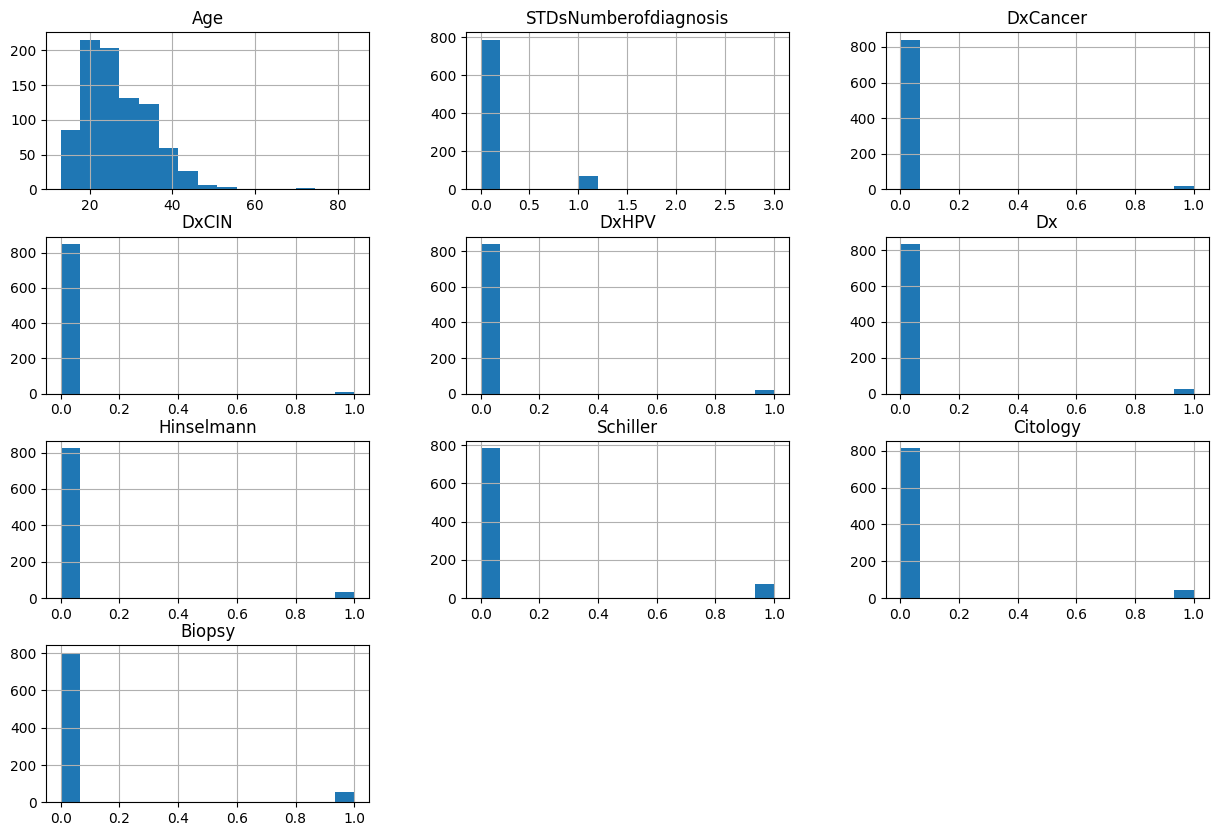

In [ ]:
# Histogramas para variables cuantitativas
df.hist(bins=15, figsize=(15, 10))
plt.show()

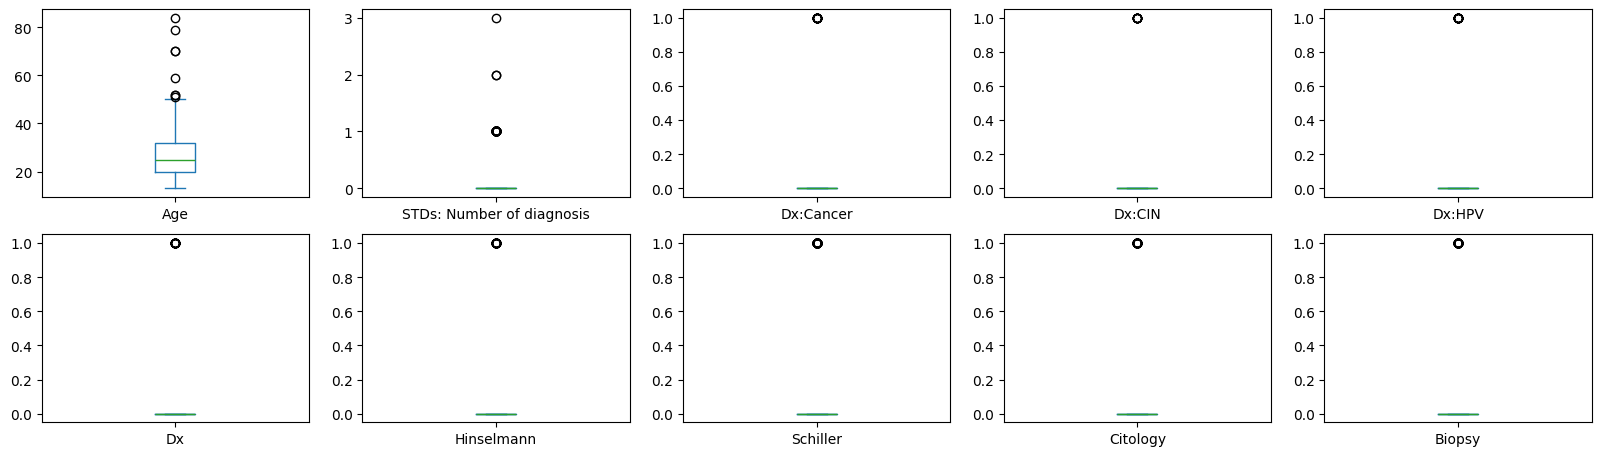

In [48]:
# Boxplots para variables cuantitativas
df.plot(kind='box', subplots=True, layout=(7,5), figsize=(20, 20))
plt.show()


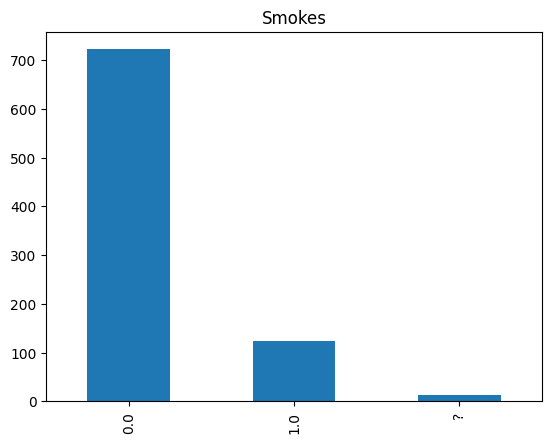

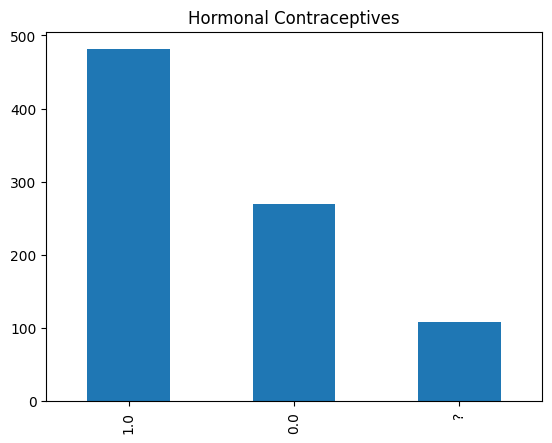

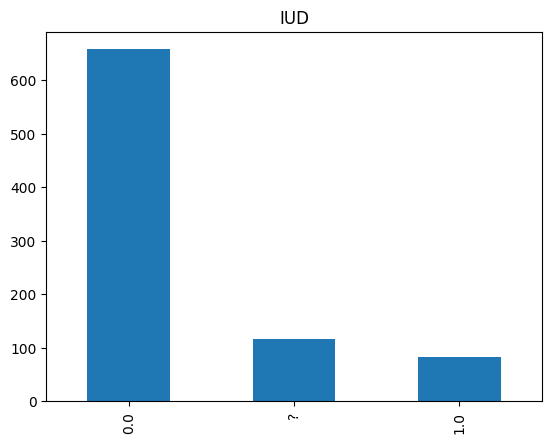

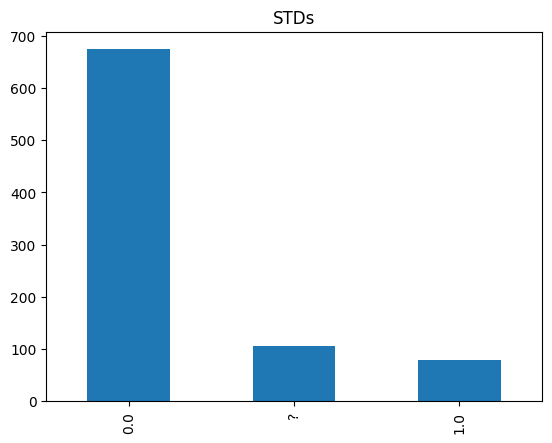

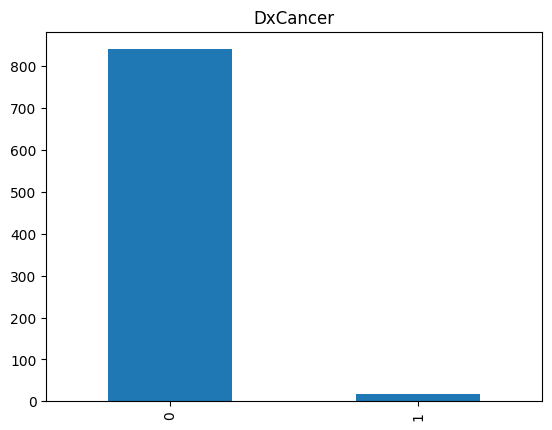

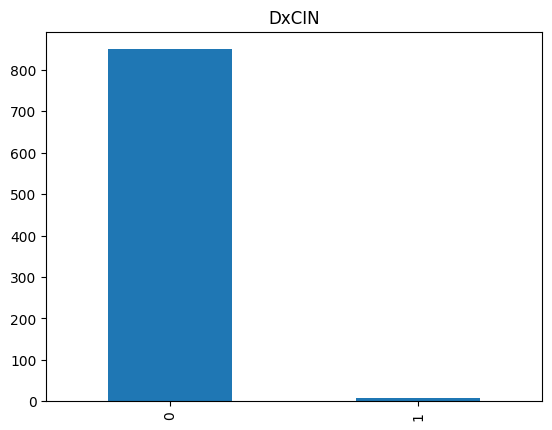

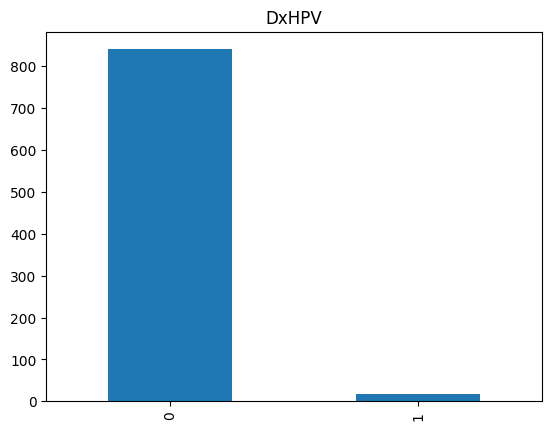

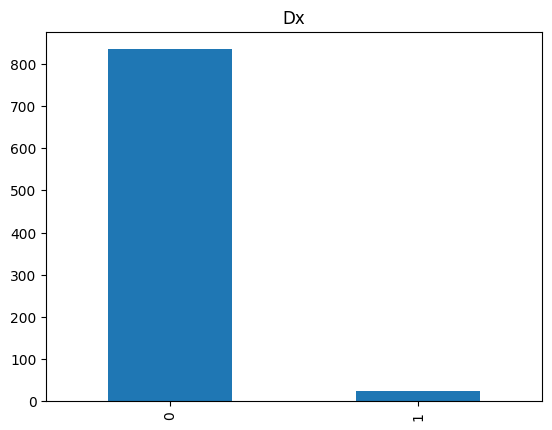

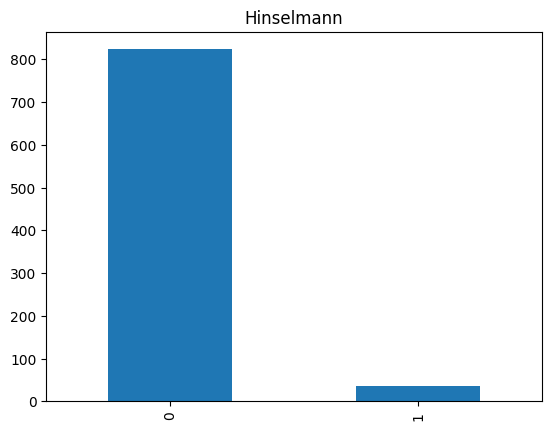

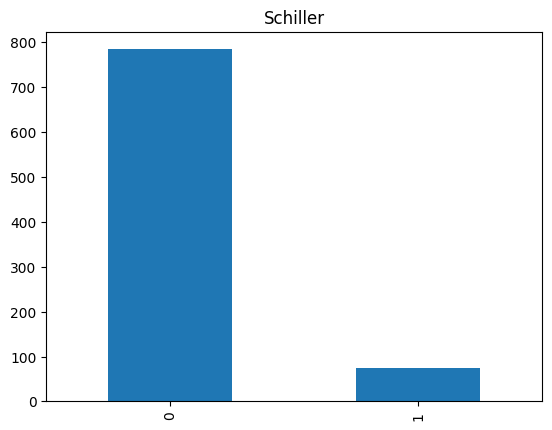

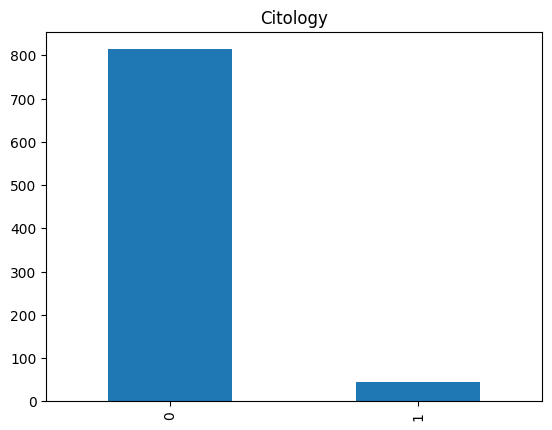

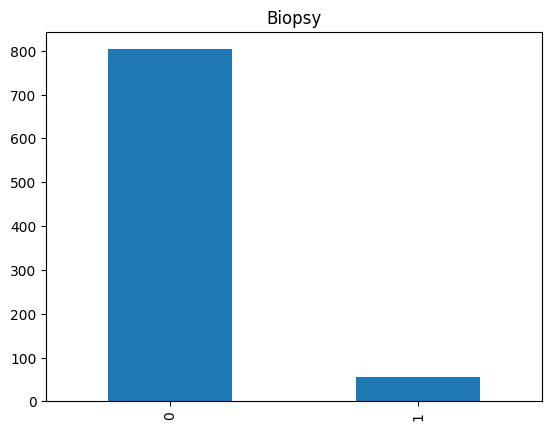

In [36]:
# Gráficos de barras para variables categóricas
categorical_vars = [
    'Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'DxCancer', 'DxCIN', 
    'DxHPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'
]

for var in categorical_vars:
    df[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.show()


C:\Users\jenni\AppData\Local\Temp\ipykernel_13980\964128836.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


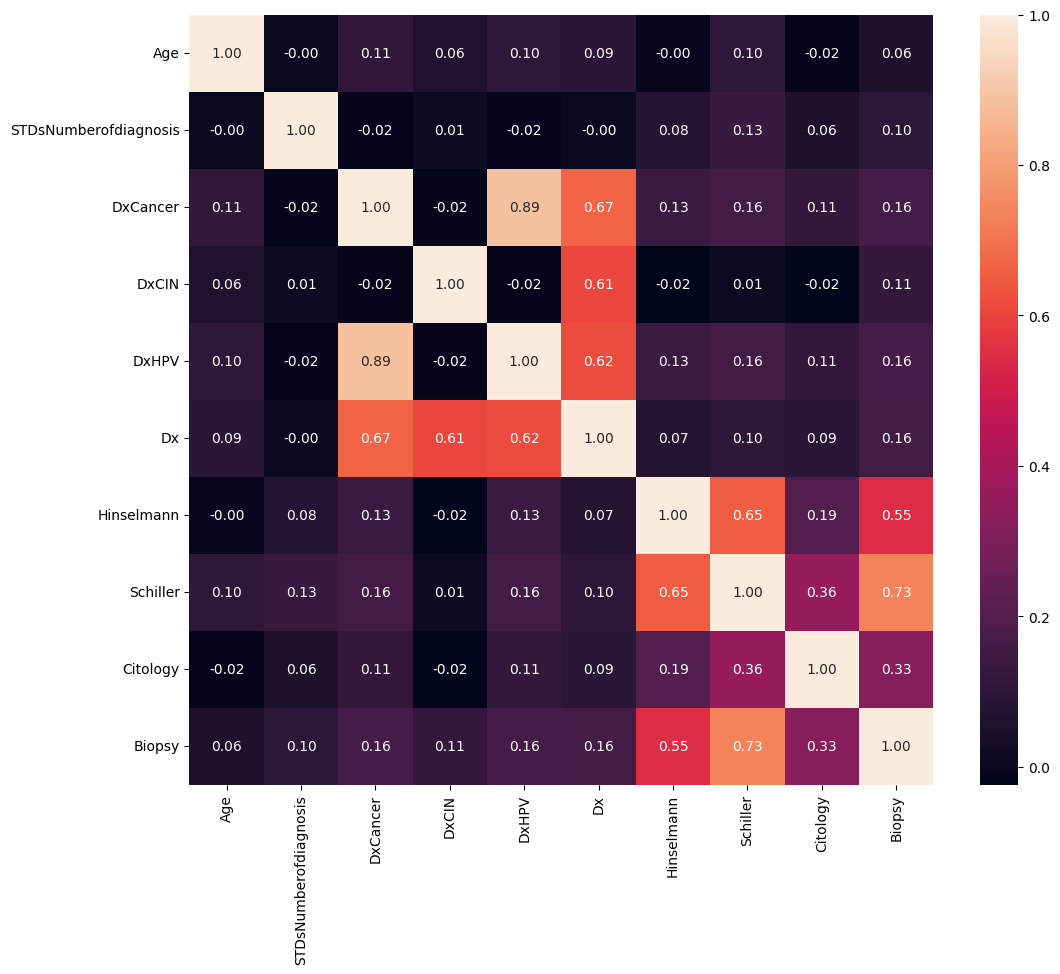

In [37]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [38]:
for var in categorical_vars:
    print(f"Frecuencia de {var}:")
    print(df[var].value_counts())
    print(f"Proporciones de {var}:")
    print(df[var].value_counts(normalize=True))

Frecuencia de Smokes:
0.0    722
1.0    123
?       13
Name: Smokes, dtype: int64
Proporciones de Smokes:
0.0    0.841492
1.0    0.143357
?      0.015152
Name: Smokes, dtype: float64
Frecuencia de Hormonal Contraceptives:
1.0    481
0.0    269
?      108
Name: Hormonal Contraceptives, dtype: int64
Proporciones de Hormonal Contraceptives:
1.0    0.560606
0.0    0.313520
?      0.125874
Name: Hormonal Contraceptives, dtype: float64
Frecuencia de IUD:
0.0    658
?      117
1.0     83
Name: IUD, dtype: int64
Proporciones de IUD:
0.0    0.766900
?      0.136364
1.0    0.096737
Name: IUD, dtype: float64
Frecuencia de STDs:
0.0    674
?      105
1.0     79
Name: STDs, dtype: int64
Proporciones de STDs:
0.0    0.785548
?      0.122378
1.0    0.092075
Name: STDs, dtype: float64
Frecuencia de DxCancer:
0    840
1     18
Name: DxCancer, dtype: int64
Proporciones de DxCancer:
0    0.979021
1    0.020979
Name: DxCancer, dtype: float64
Frecuencia de DxCIN:
0    849
1      9
Name: DxCIN, dtype: int64

## Valores faltantes

In [46]:
missing_data = df.isnull().mean() * 100
print(missing_data[missing_data > 0])

Number of sexual partners       3.030303
First sexual intercourse        0.815851
Num of pregnancies              6.526807
Smokesyears                     1.515152
Smokespacksyear                 1.515152
HormonalContraceptivesyears    12.587413
IUDyear                        13.636364
STDsnumber                     12.237762
STDsTimesincefirstdiagnosis    91.724942
STDsTimesincelastdiagnosis     91.724942
dtype: float64


### Convertir '?' a NaN y asegurar que todas las columnas sean numéricas:


In [40]:
# Muestra los tipos de datos actuales y la cantidad de valores únicos por columna
for col in df.columns:
    uniques = df[col].nunique()
    print(f"{col}: {df.dtypes[col]} - {uniques} valores únicos")

Age: int64 - 44 valores únicos
Number of sexual partners: object - 13 valores únicos
First sexual intercourse: object - 22 valores únicos
Num of pregnancies: object - 12 valores únicos
Smokes: object - 3 valores únicos
Smokesyears: object - 31 valores únicos
Smokespacksyear: object - 63 valores únicos
Hormonal Contraceptives: object - 3 valores únicos
HormonalContraceptivesyears: object - 41 valores únicos
IUD: object - 3 valores únicos
IUDyear: object - 27 valores únicos
STDs: object - 3 valores únicos
STDsnumber: object - 6 valores únicos
STDscondylomatosis: object - 3 valores únicos
STDscervicalcondylomatosis: object - 2 valores únicos
STDsvaginalcondylomatosis: object - 3 valores únicos
STDsvulvoperinealcondylomatosis: object - 3 valores únicos
STDsyphilis: object - 3 valores únicos
STDspelvicinflammatorydisease: object - 3 valores únicos
STDsgenitalherpes: object - 3 valores únicos
STDsmolluscumcontagiosum: object - 3 valores únicos
STDsAIDS: object - 2 valores únicos
STDsHIV: obj

In [41]:
numeric_cols = [
    'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',
    'Smokesyears', 'Smokespacksyear', 'HormonalContraceptivesyears', 'IUDyear',
    'STDsnumber', 'STDsTimesincefirstdiagnosis', 'STDsTimesincelastdiagnosis'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [42]:
# Convertir a categórico donde es relevante
categorical_cols = [
    'Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDscondylomatosis',
    'STDscervicalcondylomatosis', 'STDsvaginalcondylomatosis', 'STDsvulvoperinealcondylomatosis',
    'STDsyphilis', 'STDspelvicinflammatorydisease', 'STDsgenitalherpes',
    'STDsmolluscumcontagiosum', 'STDsAIDS', 'STDsHIV', 'STDsHepatitisB', 'STDsHPV'
]

for col in categorical_cols:
    df[col] = pd.Categorical(df[col])

In [ ]:
columns_to_convert = [
    'Age', 'Number of sexual partners', 'First sexual intercourse', 
    'Num of pregnancies', 'Smokesyears', 'Smokespacksyear', 
    'Hormonal Contraceptives years', 'IUD years', 'STDs number'
]

# Convertir solo las columnas seleccionadas
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [44]:
# Verificar los valores faltantes después de la conversión
missing_data = df[categorical_cols].isnull().mean() * 100
print("Valores faltantes por columna después de la conversión:")
print(missing_data[missing_data > 0])

Valores faltantes por columna después de la conversión:
Series([], dtype: float64)


In [45]:
# Verificar la matriz de correlación finalmente
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix)

                             Number of sexual partners  \
Number of sexual partners                     1.000000   
First sexual intercourse                     -0.150169   
Num of pregnancies                            0.079081   
Smokesyears                                   0.186932   
Smokespacksyear                               0.182067   
HormonalContraceptivesyears                   0.019569   
IUDyear                                       0.004454   
STDsnumber                                    0.041442   
STDsTimesincefirstdiagnosis                   0.051825   
STDsTimesincelastdiagnosis                    0.077992   

                             First sexual intercourse  Num of pregnancies  \
Number of sexual partners                   -0.150169            0.079081   
First sexual intercourse                     1.000000           -0.060733   
Num of pregnancies                          -0.060733            1.000000   
Smokesyears                                 -0.058834

C:\Users\jenni\AppData\Local\Temp\ipykernel_13980\964128836.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


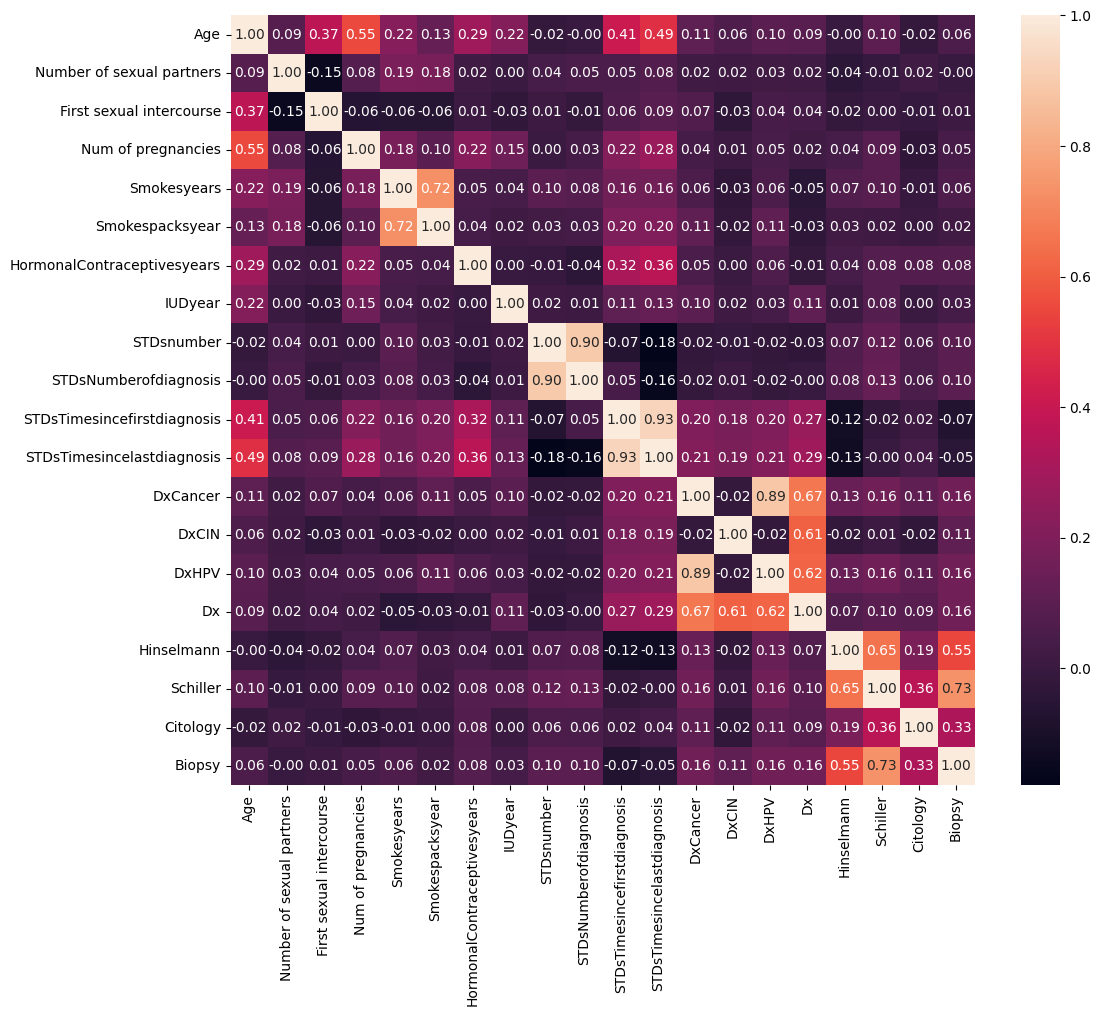

In [47]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [48]:
missing_data = df.isnull().mean() * 100
print(missing_data[missing_data > 0])

Number of sexual partners       3.030303
First sexual intercourse        0.815851
Num of pregnancies              6.526807
Smokesyears                     1.515152
Smokespacksyear                 1.515152
HormonalContraceptivesyears    12.587413
IUDyear                        13.636364
STDsnumber                     12.237762
STDsTimesincefirstdiagnosis    91.724942
STDsTimesincelastdiagnosis     91.724942
dtype: float64


Dado que el objetivo es predecir el diagnóstico de cáncer cervical, imputar los valores faltantes para las variables con menos del 15% de datos faltantes usando la mediana. Para las variables con más del 90% de datos faltantes, se considero eliminarlas

In [50]:
columns_to_impute = [
    'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',
    'Smokesyears', 'Smokespacksyear', 'HormonalContraceptivesyears', 'IUDyear', 'STDsnumber'
]

for col in columns_to_impute:
    if df[col].isnull().mean() * 100 < 15:
        df[col].fillna(df[col].median(), inplace=True)

In [51]:
# Columnas a eliminar (más del 90% de datos faltantes)
columns_to_drop = ['STDsTimesincefirstdiagnosis', 'STDsTimesincelastdiagnosis']
df.drop(columns=columns_to_drop, inplace=True)

In [53]:
# Verificar que no hay valores faltantes
assert df.notnull().all().all(), "Aún hay valores faltantes en las columnas numéricas"

In [54]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
print(correlation_matrix)

                                  Age  Number of sexual partners  \
Age                          1.000000                   0.085971   
Number of sexual partners    0.085971                   1.000000   
First sexual intercourse     0.369175                  -0.145847   
Num of pregnancies           0.525892                   0.077439   
Smokesyears                  0.218261                   0.175729   
Smokespacksyear              0.131861                   0.174968   
HormonalContraceptivesyears  0.295267                   0.021188   
IUDyear                      0.215427                   0.006252   
STDsnumber                  -0.001330                   0.041459   
STDsNumberofdiagnosis       -0.001606                   0.053056   
DxCancer                     0.110340                   0.023699   
DxCIN                        0.061443                   0.016669   
DxHPV                        0.101722                   0.028646   
Dx                           0.092635           

C:\Users\jenni\AppData\Local\Temp\ipykernel_13980\964128836.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


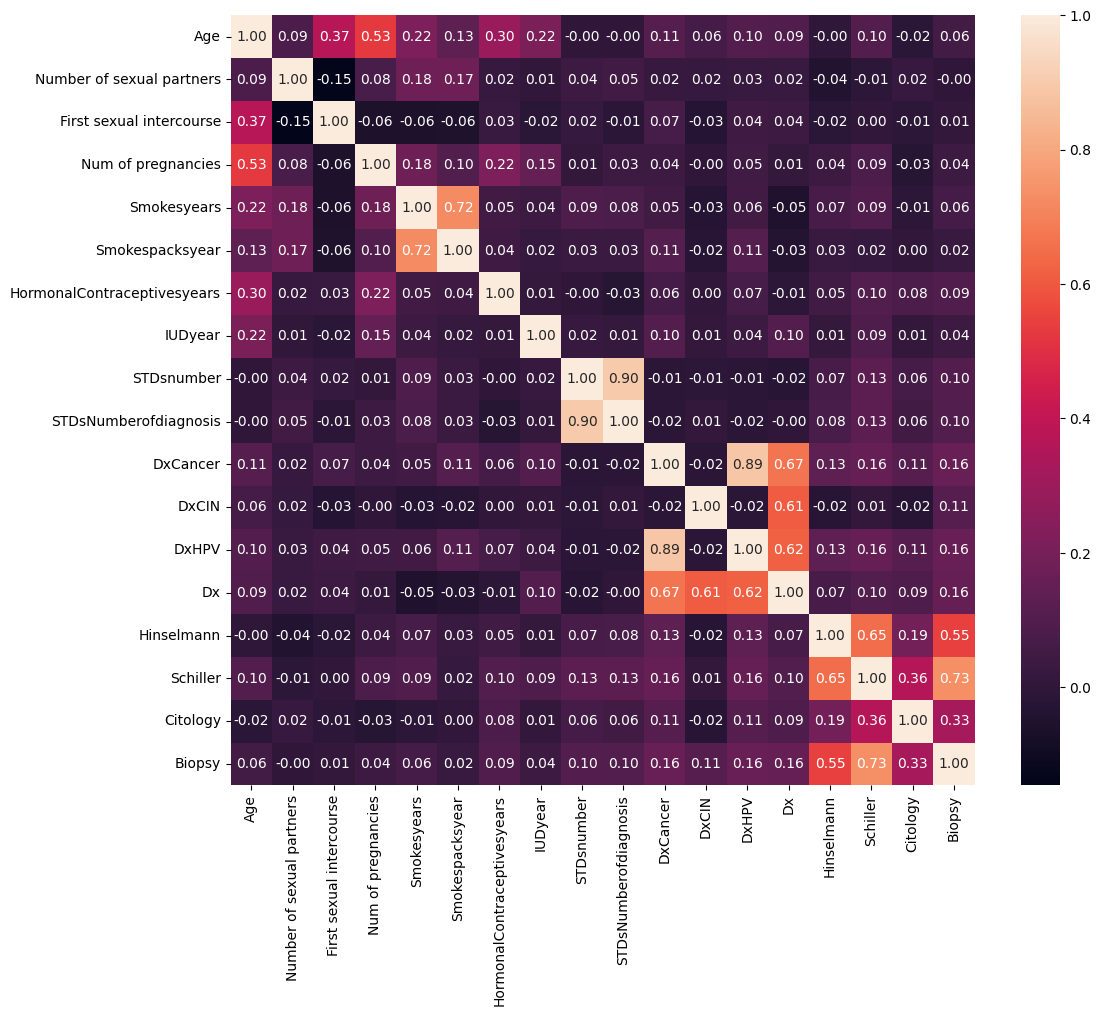

In [55]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

Todos los valores en la matriz de correlación son finitos.


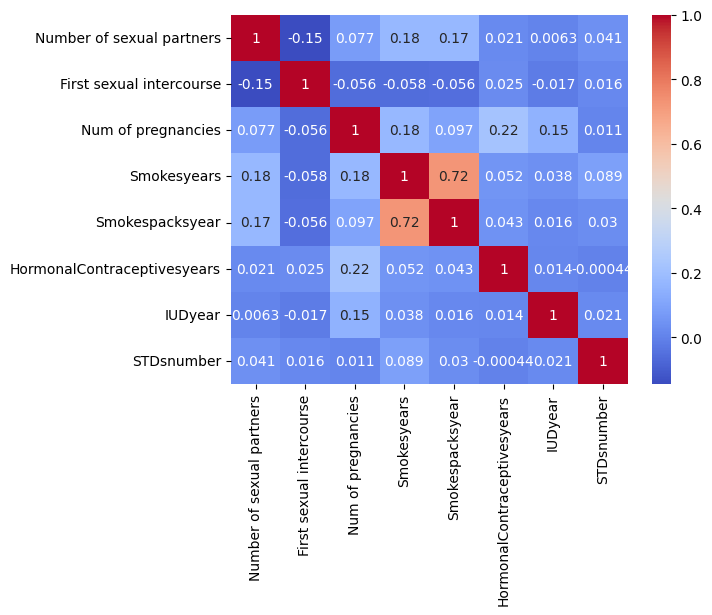

In [57]:
# Calcular la matriz de correlación
correlation_matrix = df[columns_to_impute].corr()

if np.isfinite(correlation_matrix).all().all():
    print("Todos los valores en la matriz de correlación son finitos.")
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.show()
else:
    print("Hay valores no finitos en la matriz de correlación.")

### Test de Esfericidad de Bartlett

H0: La matriz de correlación es igual a la matriz identidad

In [59]:
chi_cuadrado, p_valor = calculate_bartlett_sphericity(df[columns_to_impute])
print(f"Chi cuadrado: {chi_cuadrado}, p-valor: {p_valor}")

if p_valor < 0.05:
    print("Rechazamos la hipótesis nula: La matriz de correlación no es la matriz identidad.")
    print("Es apropiado proceder con el PCA u otros análisis basados en correlaciones.")
else:
    print("No rechazamos la hipótesis nula: La matriz de correlación podría ser la matriz identidad.")

Chi cuadrado: 791.5304725782428, p-valor: 1.2829733280616946e-148
Rechazamos la hipótesis nula: La matriz de correlación no es la matriz identidad.
Es apropiado proceder con el PCA u otros análisis basados en correlaciones.


## índice KMO

Proporción de varianza entre todas las variables observadas que podría ser común a algunas variables subyacentes. Los valores de KMO están entre 0 y 1. Un valor de KMO cercano a 1 sugiere que un factor o componentes principales análisis podría ser apropiado, mientras que un valor cercano a 0 sugiere lo contrario.

In [62]:
# Preparar los datos, asegurándose de que no haya valores faltantes
df_kmo = df[columns_to_impute].dropna()

In [63]:
# Calcular el índice KMO
kmo_all, kmo_model = calculate_kmo(df_kmo)

print(f"Índice KMO global: {kmo_model}")
if kmo_model > 0.6:
    print("Los resultados del KMO indican que la realización de un análisis factorial/PCA es adecuada.")
else:
    print("Los resultados del KMO sugieren que el análisis factorial/PCA puede no ser adecuado.")

Índice KMO global: 0.5371626250065826
Los resultados del KMO sugieren que el análisis factorial/PCA puede no ser adecuado.


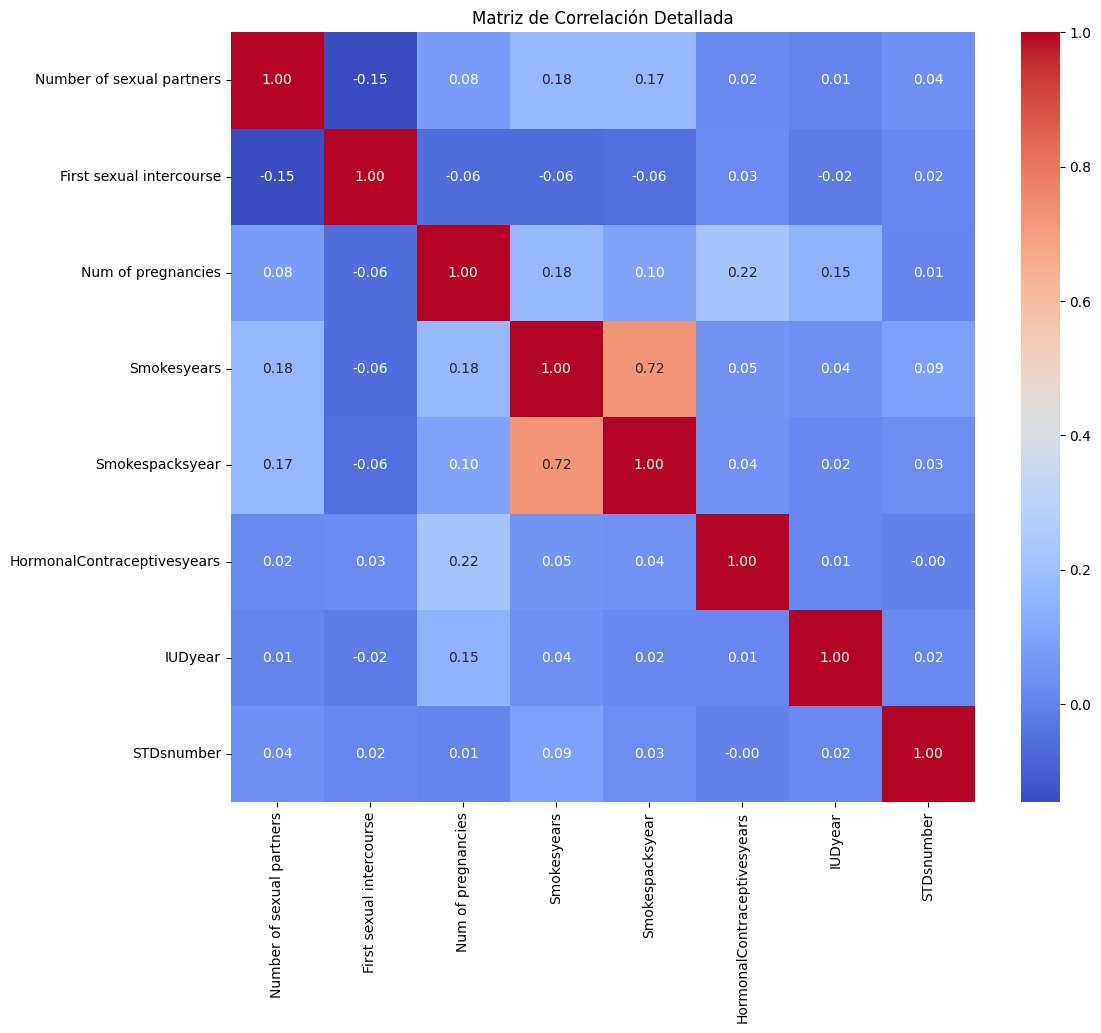

In [64]:
# Visualización de la matriz de correlación con heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación Detallada')
plt.show()

La presencia de correlaciones perfectas sugiere redundancia significativa en los datos. Esto no es ideal para muchos métodos estadísticos y analíticos, incluyendo PCA, porque no añaden valor y pueden distorsionar los resultados al exagerar la importancia de los componentes correlacionados.

In [65]:
df.drop('Smokespacksyear', axis=1, inplace=True)

In [66]:
# Calcular la nueva matriz de correlación
updated_columns = [col for col in df.columns if col != 'Smokespacksyear']
new_correlation_matrix = df[updated_columns].corr()

C:\Users\jenni\AppData\Local\Temp\ipykernel_13980\525749071.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_correlation_matrix = df[updated_columns].corr()


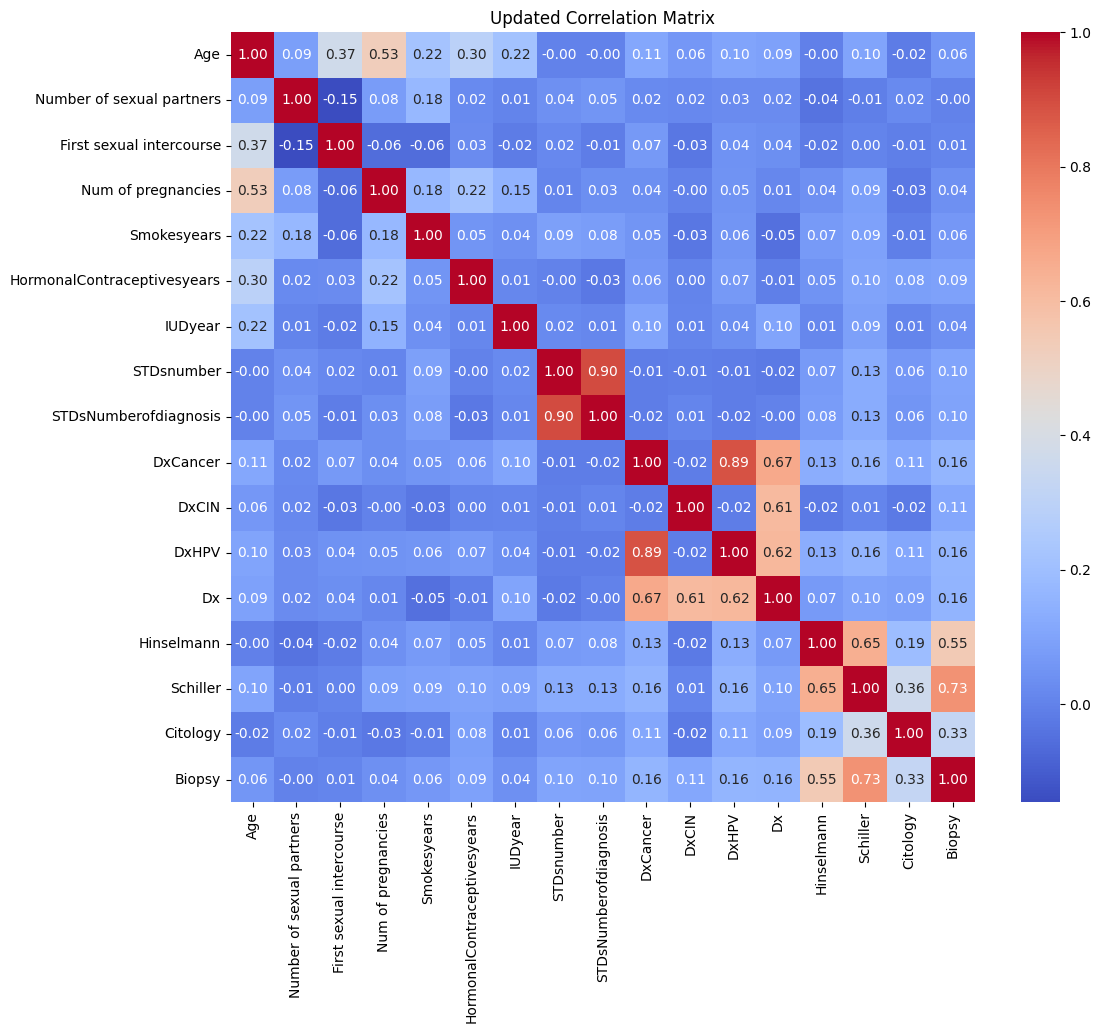

In [67]:
# Visualizar la nueva matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(new_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Updated Correlation Matrix')
plt.show()

In [126]:
selected_columns = [
    'Smokesyears', 'IUDyear', 'STDsnumber', 'DxCancer','Dx', 'Biopsy','Number of sexual partners', 
    'Age', 'Num of pregnancies',
]
df_selected = df[selected_columns]


In [128]:
# Calcular el índice KMO
kmo_all, kmo_model = calculate_kmo(df_selected)
print(f"Índice KMO global: {kmo_model}")


Índice KMO global: 0.5610325890476551


Un KMO de 0.561 no impide realizar análisis factoriales o PCA, pero sí sugiere que los resultados deben ser tratados con un nivel adicional de escrutinio y validación. Continuar con una combinación de métodos analíticos y asegurarse de las interpretaciones son robustas y justificadas por los datos ayudará a hacer el mejor uso posible del análisis. 

## Análisis de componentes principales

In [130]:
selected_columns = [
    'Smokesyears', 'IUDyear', 'STDsnumber', 'DxCancer', 'Dx', 'Biopsy', 
    'Number of sexual partners', 'Age', 'Num of pregnancies'
]
df_selected = df[selected_columns]

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_selected)

# Extraer el modelo PCA del pipeline
modelo_pca = pca_pipe.named_steps['pca']

# Convertir el array de componentes PCA en un DataFrame para una mejor visualización
pca_components_df = pd.DataFrame(
    data=modelo_pca.components_,
    columns=df_selected.columns,
    index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']  # Asegúrate de tener un índice para cada componente principal
)

print(pca_components_df)

     Smokesyears   IUDyear  STDsnumber  DxCancer        Dx    Biopsy  \
PC1     0.242412  0.287308    0.047812  0.464853  0.437409  0.228969   
PC2    -0.324868 -0.092633   -0.075113  0.477661  0.517878  0.150807   
PC3     0.398362 -0.262586    0.604690  0.013893 -0.034486  0.376575   
PC4     0.226813 -0.325125   -0.476207  0.143273  0.124648 -0.437721   
PC5    -0.122282  0.704601    0.339019  0.011513  0.040129 -0.459758   
PC6    -0.008034  0.430861   -0.505658 -0.175122 -0.155333  0.600393   
PC7     0.768370  0.210076   -0.168227  0.108717 -0.044962 -0.139507   
PC8    -0.073243 -0.089302    0.026857 -0.078145 -0.003339  0.007421   
PC9    -0.121599 -0.002231    0.002025  0.697356 -0.704257  0.007444   

     Number of sexual partners       Age  Num of pregnancies  
PC1                   0.146907  0.466230            0.397001  
PC2                  -0.174763 -0.379922           -0.431572  
PC3                   0.410701 -0.217627           -0.217897  
PC4                   0.617

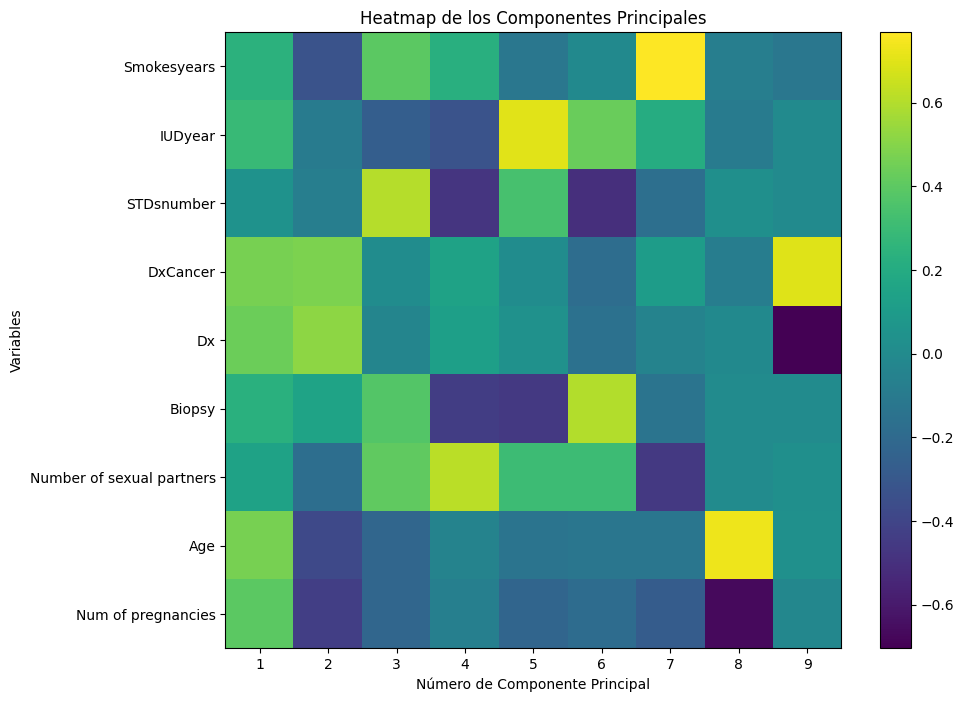

In [131]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

# Datos de los componentes del PCA
componentes = modelo_pca.components_

im = ax.imshow(componentes.T, cmap='viridis')

# Ajustar los ticks y etiquetas del eje y para que correspondan a las variables originales
ax.set_yticks(range(len(df_selected.columns)))
ax.set_yticklabels(df_selected.columns)

# Ajustar los ticks y etiquetas del eje x para que correspondan a los números de los componentes principales
ax.set_xticks(range(modelo_pca.n_components_))
ax.set_xticklabels(np.arange(modelo_pca.n_components_) + 1)

# Agregar una barra de color para interpretar los valores de los componentes
plt.colorbar(im, ax=ax)

ax.set_title('Heatmap de los Componentes Principales')
ax.set_xlabel('Número de Componente Principal')
ax.set_ylabel('Variables')
plt.show()


#### Porcentaje de la varianza explicada por cada componente

In [132]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.21615496 0.17651322 0.12657942 0.11383426 0.10001539 0.09198879
 0.08727131 0.05147628 0.03616638]


#### Scree plot

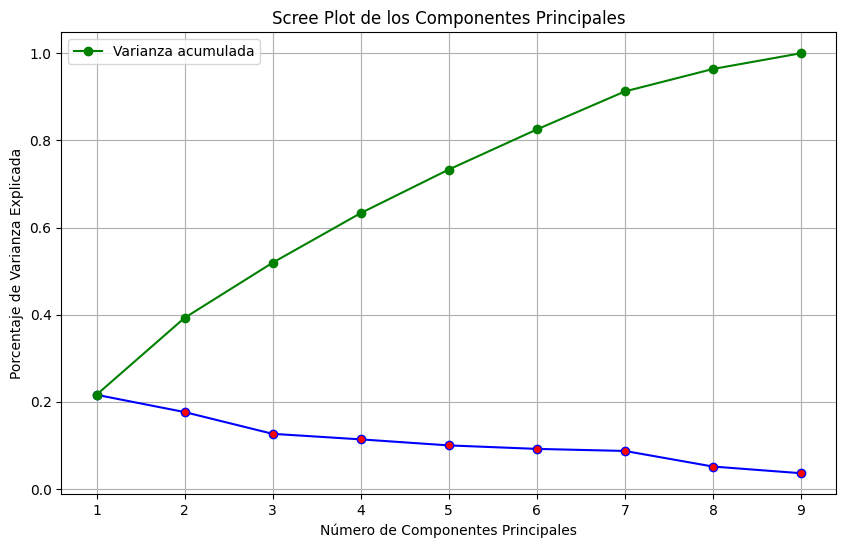

In [133]:
explained_variance = np.array([0.21615496, 0.17651322, 0.12657942, 0.11383426, 0.10001539,
                               0.09198879, 0.08727131, 0.05147628, 0.03616638])

# array con el número de componentes 
components = np.arange(1, len(explained_variance) + 1)

#scree plot
plt.figure(figsize=(10, 6))
plt.plot(components, explained_variance, 'o-', color='b', markerfacecolor='r')
plt.title('Scree Plot de los Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.xticks(components)
plt.grid(True)

# Añadir una línea que muestra la acumulación de la varianza explicada
cumulative_variance = np.cumsum(explained_variance)
plt.plot(components, cumulative_variance, 'o-', color='green', label='Varianza acumulada')
plt.legend()

plt.show()

## Reglas de Asociación

In [148]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokesyears,Hormonal Contraceptives,HormonalContraceptivesyears,IUD,IUDyear,...,STDsHPV,STDsNumberofdiagnosis,DxCancer,DxCIN,DxHPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,1.0,3.0,0.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,1.0,15.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [149]:
for col in categorical_cols:
    df[col] = pd.Categorical(df[col])

for col in categorical_cols:
    if "STDs" in col:
        df[col] = df[col].cat.rename_categories({0: f'{col}_no', 1: f'{col}_yes'})
    else:
        df[col] = df[col].cat.rename_categories({0: f'{col}_no', 1: f'{col}_yes'})

# Crear una lista de listas de transacciones
transactions = df[categorical_cols].apply(lambda x: x.astype(str).values.tolist(), axis=1)

print(transactions.head())


0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3    [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
dtype: object


In [150]:
print(df[categorical_cols].shape)

records = []
for i in range(df.shape[0]): 
    records.append([str(df.values[i, j]) for j in range(df[categorical_cols].shape[1])])

print(records[:5])


(858, 16)
[['18', '4.0', '15.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0'], ['15', '1.0', '14.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0'], ['34', '1.0', '17.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0'], ['52', '5.0', '16.0', '4.0', '1.0', '37.0', '1.0', '3.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0'], ['46', '3.0', '21.0', '4.0', '0.0', '0.0', '1.0', '15.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0']]


In [151]:
# El mínimo de cobertura o soporte es 20% y el mínimo de confianza es 70%
reglas_asociacion = apriori(records,min_support=0.2, min_confidence = 0.8)
reglas = list(reglas_asociacion)

In [152]:
print(len(reglas))

10


In [153]:
print(reglas[0])

RelationRecord(items=frozenset({'0.0'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0.0'}), confidence=1.0, lift=1.0)])


In [154]:
list(reglas)

[RelationRecord(items=frozenset({'0.0'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0.0'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'1.0'}), support=0.8752913752913752, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'1.0'}), confidence=0.8752913752913752, lift=1.0)]),
 RelationRecord(items=frozenset({'0.0', '1.0'}), support=0.8752913752913752, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0.0', '1.0'}), confidence=0.8752913752913752, lift=1.0), OrderedStatistic(items_base=frozenset({'0.0'}), items_add=frozenset({'1.0'}), confidence=0.8752913752913752, lift=1.0), OrderedStatistic(items_base=frozenset({'1.0'}), items_add=frozenset({'0.0'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'15.0', '0.0'}), support=0.20396270396270397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'15.0'}), items_add=frozenset({'0.0'})

In [156]:
def inspect(output):
    lhs = []
    rhs = []
    support = []
    confidence = []
    lift = []

    for result in output:
        if len(result[2]) > 0:
            first_rule = result[2][0]
            if len(first_rule) >= 4: 
                lhs.append(tuple(first_rule[0])[0] if first_rule[0] else None)
                rhs.append(tuple(first_rule[1])[0] if first_rule[1] else None)
                support.append(result[1])
                confidence.append(first_rule[2])
                lift.append(first_rule[3])
            else:
                lhs.append(None)
                rhs.append(None)
                support.append(result[1])
                confidence.append(None)
                lift.append(None)
        else:
            lhs.append(None)
            rhs.append(None)
            support.append(None)
            confidence.append(None)
            lift.append(None)

    return list(zip(lhs, rhs, support, confidence, lift))

In [157]:
# Crear DataFrame a partir de los resultados procesados
output_DataFrame = pd.DataFrame(inspect(output), columns=['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])

In [158]:
output_DataFrame = pd.DataFrame(inspect(output), columns=['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])

print(output_DataFrame)
print(output_DataFrame.head())
print(output_DataFrame.head(10)) 
output_DataFrame


  Left_Hand_Side Right_Hand_Side   Support  Confidence      Lift
0           None             0.0  1.000000    1.000000  1.000000
1           None             1.0  0.875291    0.875291  1.000000
2           None             0.0  0.875291    0.875291  1.000000
3           15.0             0.0  0.203963    1.000000  1.000000
4            2.0             0.0  0.594406    1.000000  1.000000
5            3.0             0.0  0.400932    1.000000  1.000000
6            2.0             1.0  0.497669    0.837255  0.956544
7            3.0             1.0  0.344988    0.860465  0.983061
8            2.0             0.0  0.497669    0.837255  0.956544
9            3.0             0.0  0.344988    0.860465  0.983061
  Left_Hand_Side Right_Hand_Side   Support  Confidence  Lift
0           None             0.0  1.000000    1.000000   1.0
1           None             1.0  0.875291    0.875291   1.0
2           None             0.0  0.875291    0.875291   1.0
3           15.0             0.0  0.20396

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
0,None,0.0,1.000000,1.000000,1.000000
1,None,1.0,0.875291,0.875291,1.000000
2,None,0.0,0.875291,0.875291,1.000000
3,15.0,0.0,0.203963,1.000000,1.000000
4,2.0,0.0,0.594406,1.000000,1.000000
5,3.0,0.0,0.400932,1.000000,1.000000
6,2.0,1.0,0.497669,0.837255,0.956544
7,3.0,1.0,0.344988,0.860465,0.983061
8,2.0,0.0,0.497669,0.837255,0.956544
9,3.0,0.0,0.344988,0.860465,0.983061
